# Спектральная кластеризация (Spectral clustering)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

В данном задании вам предлагается проделать упражнения по спектральному разложению графа связей из туториала David Gleich'а: https://www.dropbox.com/s/w06niyzfe2r8y90/tutorial.pdf?dl=0.

### Часть 1. Finding a partition
Сгенерируем данные, описывающие граф, состоящий из двух независимых частей и перемешаем матрицу связей.

In [3]:
# задаем число вершин графа 
# (каждая вершина – отдельный актор, например, человек с политическими убеждениями республиканец или демократ)
n = 1000

# создаем массив из n номеров вершин
x = np.arange(n)

# осуществляем случайную перестановку номеров вершин
np.random.shuffle(x)

# задаем размер первой группы 
gs = 450

# отбираем gs представителей в первую группу
group1 = x[:gs]

# отбираем n-gs представителей во вторую группу
group2 = x[gs:]

# вероятность связи двух людей в первой группе
p_group1 = .5

# вероятность связи двух людей во второй группе
p_group2 = .4

# вероятность межгрупповых связей
p_between = 0.1

# инициализация матрицы смежности nxn
A = np.zeros([n, n])

In [4]:
B=np.zeros([2,3])

In [5]:
assert A.shape == (1000, 1000)

In [6]:
# подматрица смежности первой группы
A[np.ix_(group1, group1)].shape

(450, 450)

In [7]:
group1[:10]

array([507, 454, 188, 703, 169, 879, 287, 826, 527,  22])

In [8]:
# порождение связей в первой группы
A[np.ix_(group1, group1)] = np.random.rand(gs, gs) < p_group1



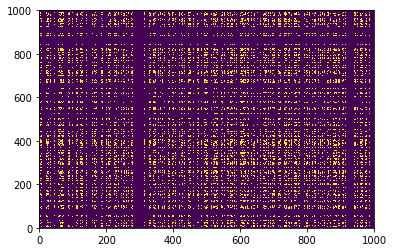

In [9]:
plt.pcolormesh(A)

In [10]:
# порождение связей во второй группе
A[np.ix_(group2, group2)] = np.random.rand(n-gs, n-gs) < p_group2

# порождение межгрупповых связей в первой группы
A[np.ix_(group1, group2)] = np.random.rand(gs, n-gs) < p_between




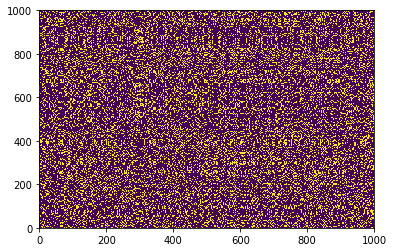

In [11]:
plt.pcolormesh(A);

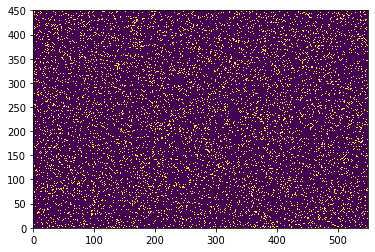

In [12]:
plt.pcolormesh(A[np.ix_(group1, group2)]);

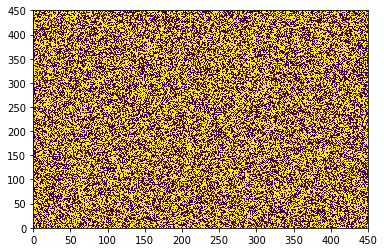

In [13]:
plt.pcolormesh(A[np.ix_(group1, group1)])

In [14]:
# нам нужна симметричная матрица для моделирования отношения "дружба"
# отрезаем верхнюю треугольную матрицу
A = np.triu(A,1)



In [15]:
help(np.triu)

Help on function triu in module numpy:

triu(m, k=0)
    Upper triangle of an array.
    
    Return a copy of an array with the elements below the `k`-th diagonal
    zeroed.
    
    Please refer to the documentation for `tril` for further details.
    
    See Also
    --------
    tril : lower triangle of an array
    
    Examples
    --------
    >>> np.triu([[1,2,3],[4,5,6],[7,8,9],[10,11,12]], -1)
    array([[ 1,  2,  3],
           [ 4,  5,  6],
           [ 0,  8,  9],
           [ 0,  0, 12]])



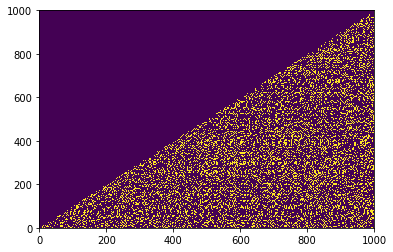

In [16]:
plt.pcolormesh(A);

In [17]:
# транспонируем и прибавляем к исходной
A = A + A.T

In [18]:
A[10,2]==A[2,10]

True

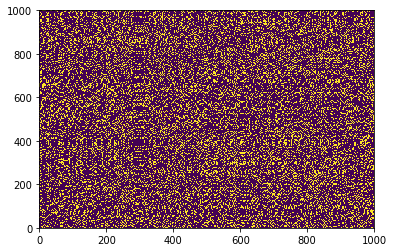

In [19]:
# визуализируем (структура на первый взгляд отсутствует)
plt.pcolormesh(A);

In [20]:
A

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

Проделаем манипуляции, описанные в пункте 1 методички. Т.е. вычислим матрицу Лапласа L=D-A, найдем ее второй наименьший собственный вектор, отсортируем его компоненты в порядке возрастания, используя найденную перестановку вершин восстановим модельную структуру в виде двух групп "друзей".

In [21]:
L=np.diag(sum(A))-A

In [22]:
%%time
w,v=np.linalg.eig(L)

Wall time: 2.97 s


In [23]:
from scipy.sparse.linalg import eigsh

In [24]:
%%time
W,V=eigsh(L,which='SA', k = 3)

Wall time: 161 ms


In [25]:
W

array([-9.09900650e-15,  4.48805653e+01,  1.94636060e+02])

In [26]:
sorted(w)

[1.4210854715202004e-14,
 44.880565308669894,
 194.63606007512442,
 195.84286430955646,
 196.79173943926114,
 199.38491838157879,
 199.96068092121425,
 200.44507725168242,
 201.20687960271738,
 201.31011145153147,
 201.33658833934322,
 202.05541633657103,
 202.66641643508999,
 202.75044824817317,
 203.2611005366879,
 203.67714101318109,
 203.78887230904408,
 204.47135803221892,
 204.56614258085463,
 204.6702178858311,
 204.86396630961892,
 205.12137518261258,
 205.45423658448135,
 205.62124073203825,
 205.95856129468785,
 206.17691368982534,
 206.48479216415924,
 206.76481485667492,
 206.84300409915735,
 207.01596448343176,
 207.26927771056648,
 207.4578091645528,
 207.7984975315636,
 207.86051245372036,
 207.98691413356423,
 208.19374183519565,
 208.32037826901893,
 208.43524650774324,
 208.64267742722316,
 208.8286072162738,
 208.8857503592184,
 209.11814020324468,
 209.14169246357852,
 209.3479141248739,
 209.6177611070082,
 209.6784530454493,
 209.86671832539022,
 210.0591500938399

In [27]:
np.finfo(float).eps

2.220446049250313e-16

In [28]:
W[1] - w[1]

-3.552713678800501e-14

In [29]:
V[:,0]

array([-0.03162278, -0.03162278, -0.03162278, -0.03162278, -0.03162278,
       -0.03162278, -0.03162278, -0.03162278, -0.03162278, -0.03162278,
       -0.03162278, -0.03162278, -0.03162278, -0.03162278, -0.03162278,
       -0.03162278, -0.03162278, -0.03162278, -0.03162278, -0.03162278,
       -0.03162278, -0.03162278, -0.03162278, -0.03162278, -0.03162278,
       -0.03162278, -0.03162278, -0.03162278, -0.03162278, -0.03162278,
       -0.03162278, -0.03162278, -0.03162278, -0.03162278, -0.03162278,
       -0.03162278, -0.03162278, -0.03162278, -0.03162278, -0.03162278,
       -0.03162278, -0.03162278, -0.03162278, -0.03162278, -0.03162278,
       -0.03162278, -0.03162278, -0.03162278, -0.03162278, -0.03162278,
       -0.03162278, -0.03162278, -0.03162278, -0.03162278, -0.03162278,
       -0.03162278, -0.03162278, -0.03162278, -0.03162278, -0.03162278,
       -0.03162278, -0.03162278, -0.03162278, -0.03162278, -0.03162278,
       -0.03162278, -0.03162278, -0.03162278, -0.03162278, -0.03

In [30]:
V[:,1] - v[:,1]

array([-0.07140535,  0.05133785, -0.06941481, -0.07021275,  0.05150526,
       -0.06882972, -0.07325581,  0.05632709,  0.05665375, -0.0712351 ,
       -0.07026565,  0.04803652,  0.05543226, -0.06981329, -0.07073736,
       -0.07180329, -0.07020926, -0.07399482, -0.07179286, -0.07210054,
       -0.07104576, -0.07251459,  0.058928  , -0.07210602, -0.07103753,
        0.04999642,  0.05400693,  0.05631215,  0.05293576, -0.07101637,
       -0.07091505, -0.07036448,  0.05241923, -0.07073033,  0.05600139,
        0.05212541, -0.06650589, -0.06844583, -0.06782634, -0.0691335 ,
       -0.07040561, -0.07114901, -0.070525  , -0.07117251, -0.07005584,
       -0.06816857,  0.05042402, -0.07004001, -0.06982974, -0.06844593,
        0.05138812, -0.07055372, -0.0678723 ,  0.05105238,  0.04845226,
       -0.06823943, -0.06915512, -0.06887737,  0.05351385,  0.05411973,
       -0.06727345,  0.05443375,  0.05681671, -0.06906328,  0.05339525,
        0.05872618, -0.07073145,  0.05621603, -0.07165793, -0.07

In [31]:
v[:,1]

array([ 0.03570267, -0.02566893,  0.0347074 ,  0.03510637, -0.02575263,
        0.03441486,  0.0366279 , -0.02816355, -0.02832688,  0.03561755,
        0.03513282, -0.02401826, -0.02771613,  0.03490665,  0.03536868,
        0.03590165,  0.03510463,  0.03699741,  0.03589643,  0.03605027,
        0.03552288,  0.03625729, -0.029464  ,  0.03605301,  0.03551876,
       -0.02499821, -0.02700347, -0.02815608, -0.02646788,  0.03550818,
        0.03545753,  0.03518224, -0.02620961,  0.03536517, -0.02800069,
       -0.0260627 ,  0.03325295,  0.03422292,  0.03391317,  0.03456675,
        0.03520281,  0.0355745 ,  0.0352625 ,  0.03558625,  0.03502792,
        0.03408428, -0.02521201,  0.03502   ,  0.03491487,  0.03422297,
       -0.02569406,  0.03527686,  0.03393615, -0.02552619, -0.02422613,
        0.03411971,  0.03457756,  0.03443869, -0.02675692, -0.02705987,
        0.03363672, -0.02721687, -0.02840835,  0.03453164, -0.02669763,
       -0.02936309,  0.03536572, -0.02810801,  0.03582897,  0.03

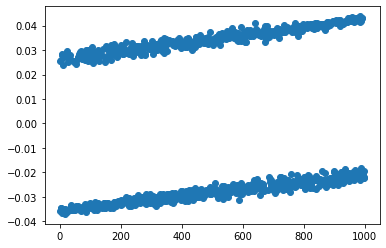

In [32]:
plt.plot(V[:,1],"o")

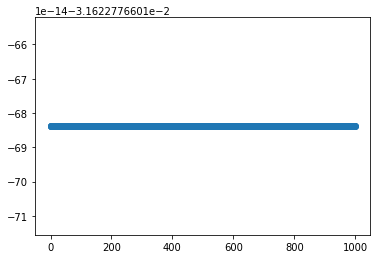

In [33]:
plt.plot(V[:,0],"-o")

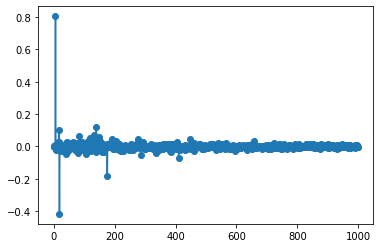

In [34]:
plt.plot(V[:,2],"-o")

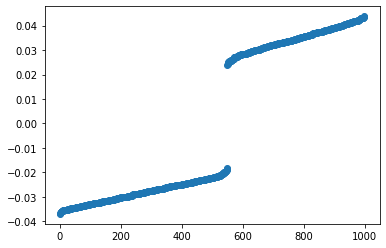

In [35]:
plt.plot(np.sort(V[:,1]),"o")

In [36]:
idx=np.argsort(V[:,1])

In [37]:
idx

array([ 17,   6,  21,  85,  23,  19,  15,  18,  68,   0,   9,  43,  41,
        20,  24,  29,  69,  30,  14,  66,  33, 113,  51,  42, 121,  40,
        31,  76,  10,  86,  84,   3,  16,  44,  47,  48,  13, 175, 137,
         2, 148, 106,  81, 164,  56, 149,  39,  63, 103,  74, 117,  57,
         5,  77, 163,  49,  37,  94, 143,  79,  80,  55,  45,  72, 138,
       132, 129, 118, 233,  52, 119,  38, 140, 131, 139, 228, 183, 109,
        60, 108, 133, 314, 176, 134, 136, 200,  97, 135, 181, 161, 171,
        36, 146, 234, 245, 156, 165,  96, 151, 153, 248, 225,  82, 281,
       203, 157, 196, 128, 184, 107, 310, 264, 306,  99, 223, 193, 297,
       159, 240, 278, 126, 309, 145, 185, 327, 194, 195, 154, 144, 207,
       372, 235, 365, 180, 224, 215, 178, 212, 114, 216, 286, 220, 259,
       222, 250, 362, 221, 270, 205, 303, 376, 336, 347, 421, 192, 346,
       410, 318, 282, 273, 253, 290, 588, 396, 300, 438, 213, 295, 247,
       359, 291, 199, 258, 210, 299, 294, 268, 285, 534, 322, 24

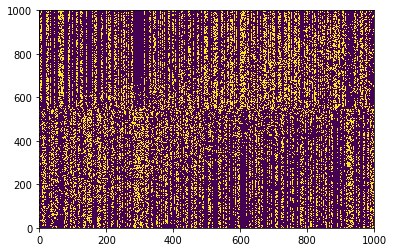

In [38]:
plt.pcolormesh(A[idx,:])

In [39]:
B=A[idx,:]

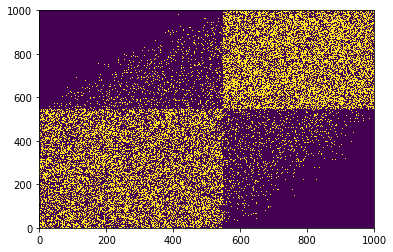

In [40]:
plt.pcolormesh(B[:,idx])

In [41]:
A

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [42]:
sum(np.dot(L,V[:,0]))

8.213874025386758e-12

### 2. Meaningful Partitions of Real Datasets
"The previous example was rather compelling. However, it was also fake."

Теперь воспользуемся реальными данными от Yahoo https://www.dropbox.com/s/ii1e09dx6o2ktit/yahoo.zip?dl=0, описывающими граф связей.

In [43]:
fff = open("us.3k.2k.smat")

In [44]:
import os
os.getcwd()

'c:\\work\\HSE\\courses\\ML-soc-2023\\day3'

In [45]:
# считываем данные, 2000 фирм, 3000 словосочетаний, 
# 92345 связей в отношении фирма покупает словосочетание
a = np.genfromtxt('C:\\work\\HSE\\courses\\RecSys2023\\us.3k.2k.smat')
a = a.astype(int)
n, m, n_connections = a[0]

In [46]:
n, m, n_connections

(3000, 2000, 92345)

In [47]:
92345/(3000*2000)

0.015390833333333333

In [48]:
#помещаем данные в матрицу смежности n x m
A_small = np.zeros((n, m))
A_small[a[1:, 0], a[1:, 1]] = 1

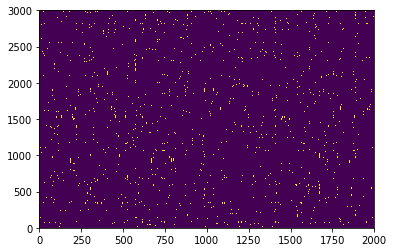

In [49]:
plt.pcolormesh(A_small)

In [50]:
sum(sum(A_small))

92345.0

In [51]:
A = np.vstack(
    (np.hstack(
        (np.zeros((n, n)), A_small)
    ),
     np.hstack((A_small.T, np.zeros((m, m))))
    )
)

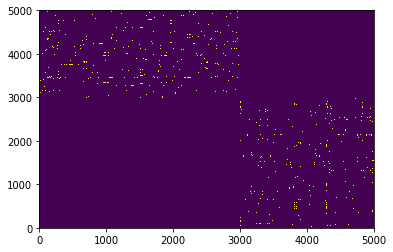

In [71]:
plt.pcolormesh(A)

In [53]:
# подсчитываем число связей как сумму всех ненулевых ячеек, т.е. единиц
sum(sum(A)) == 92345 * 2

True

In [54]:
# считываем сами словосочетания с указанием их id
with open("C:\\work\\HSE\\courses\\ML-soc-2023\\day3\\us.3k.2k.trms", 'r') as iofile:
    labels = iofile.readlines()

In [55]:
labels

['12a1970 lexmark\n',
 '2 stacker\n',
 '21 black jack\n',
 '2nd mortgage\n',
 'acapulco hotel\n',
 'accept account card credit merchant\n',
 'accept card credit\n',
 'accept card credit online\n',
 'accessory computer\n',
 'accessory desk\n',
 'accommodation\n',
 'accommodation hotel\n',
 'accommodation las vegas\n',
 'accommodation new york\n',
 'accommodation orlando\n',
 'accommodation paris\n',
 'account card credit merchant\n',
 'account cost low merchant\n',
 'account ecommerce merchant\n',
 'account internet merchant\n',
 'account merchant\n',
 'account merchant online\n',
 'account merchant provider\n',
 'account merchant service\n',
 'acid alpha lipoic\n',
 'acid amino\n',
 'acid folic\n',
 'acne medication\n',
 'acura cl\n',
 'acyclovir\n',
 'ad banner\n',
 'ad personal\n',
 'add url\n',
 'address internet\n',
 'address web\n',
 'adds personal\n',
 'adipex\n',
 'adipex buy\n',
 'adipex buy online\n',
 'adipex cheap\n',
 'adipex diet\n',
 'adipex diet pill\n',
 'adipex line\n'

In [56]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(100, affinity='precomputed', n_init=100,
                        assign_labels='discretize')
clusters = sc.fit_predict(A) 

In [57]:
clusters[:][:1000]

array([78, 15, 76, 13, 98, 43, 43, 43, 61, 61, 44, 44, 18, 44, 55, 16, 43,
       43, 43, 43, 43, 43, 43, 43, 85, 66, 85, 74, 33, 74, 86, 10, 17,  6,
        6, 10, 74,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 13,
       10, 10, 10, 10, 10, 24, 49, 56, 56, 24,  4,  4,  4,  4, 10, 24, 24,
       24,  4, 24, 24,  4,  4, 24, 35, 84, 86,  0, 86, 86, 11, 11, 86, 86,
       40, 86, 86, 68, 11, 86, 11, 11, 86, 11, 11, 86, 23, 68, 71, 71, 71,
       71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 79, 38, 38, 51, 63,
       51, 63,  0, 56, 84, 84, 41, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64,
       64, 64, 64, 64, 64, 64, 35, 57, 35, 89, 89,  3, 50, 21, 69, 33, 49,
       49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 57, 57, 29, 75,
       16,  7, 32, 32,  7, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73,
       73, 45,  4, 73, 89, 15,  9, 32, 32,  7,  7, 89, 92, 80, 72, 72, 91,
       92, 72, 92, 21, 89, 89, 32, 75, 11, 60, 58, 90, 90, 90, 19, 90, 90,
       90, 90, 90, 22, 32

In [58]:
list(np.nonzero(clusters == 60)[0])[:]

[213,
 425,
 570,
 642,
 743,
 744,
 1060,
 1440,
 1441,
 1444,
 1445,
 1449,
 1451,
 1453,
 1460,
 1563,
 1736,
 2048,
 2051,
 2458,
 2459,
 2462,
 2464,
 2466,
 2472,
 3201,
 3280,
 3297,
 3299,
 3420,
 3532,
 3622,
 3657,
 3659,
 3831,
 3904,
 4009,
 4040,
 4266,
 4335,
 4392,
 4468,
 4583,
 4804,
 4842,
 4852]

In [59]:
for i in list(np.nonzero(clusters == 64)[0])[:50]:
    if i<3000:
        print(labels[i], end = "")
    

air cheap travel
air discount travel
air ticket
air travel
airfare
airfare bargain
airfare cheap
airfare discount
airfare international
airfare low
airfare lowest
airline cheap ticket
airline discount ticket
airline reservation
airline ticket
airline travel
car rental
cheap flight
cheap ticket


In [60]:
for i in range(50):
    if idx[i]<3000:
        print(labels[idx[i]], end = "")

account cost low merchant
accept card credit
account merchant online
advertising engine search
account merchant service
account internet merchant
accommodation paris
account ecommerce merchant
adult sex
12a1970 lexmark
accessory desk
adipex online
adipex diet pill
account merchant
acid alpha lipoic
acyclovir
adult sex video
ad banner
accommodation orlando
adult picture
address internet
affiliate program web
ads free personal
adipex line
affordable promotion site web
adipex diet
ad personal
adventure vacation
accommodation
advertising free
advertising email
2nd mortgage
account card credit merchant
adipex online order
adipex p
adipex phentermine
accommodation new york
anal
airline cheap ticket
21 black jack
alpine
affiliate master program web
advertising business
amateur sex video
adult
alternative medicine
adipex cheap
adult movie sex
affiliate internet program
adult xxx


In [61]:
L=np.diag(sum(A))-A

In [62]:
W,V=eigsh(L,which='SA', k = 3)

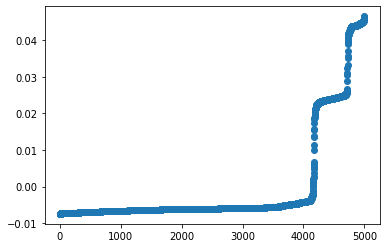

In [63]:
plt.plot(np.sort(V[:,1]),"o")

In [64]:
(V[:,1] > 0.02) & (V[:,1] < 0.03)


array([False, False,  True, ..., False, False, False])

In [65]:
labels[2]

'21 black jack\n'

In [66]:
np.nonzero((V[:,1] > 0.02) & (V[:,1] <0.03))


(array([   2,  300,  301,  302,  303,  337,  338,  339,  340,  341,  378,
         379,  380,  381,  382,  383,  412,  413,  418,  419,  420,  421,
         429,  430,  431,  443,  444,  445,  446,  447,  448,  449,  450,
         451,  452,  453,  454,  455,  456,  457,  458,  459,  460,  461,
         462,  465,  466,  467,  468,  469,  470,  471,  472,  473,  474,
         475,  476,  477,  478,  479,  480,  481,  482,  483,  484,  485,
         486,  487,  488,  489,  490,  491,  492,  493,  494,  495,  496,
         497,  498,  499,  500,  501,  502,  503,  504,  505,  506,  507,
         508,  509,  510,  535,  536,  537,  538,  539,  540,  541,  542,
         543,  544,  545,  546,  547,  548,  549,  550,  551,  552,  553,
         554,  555,  556,  557,  558,  559,  560,  561,  562,  563,  564,
         565,  584,  585,  586,  588,  589,  590,  591,  592,  593,  594,
         595,  596,  597,  598,  599,  600,  601,  602,  603,  604,  605,
         606,  607,  608,  609,  839, 

In [67]:
np.nonzero((V[:,1] > 0.02) & (V[:,1] < 0.03))[0][:30]

array([  2, 300, 301, 302, 303, 337, 338, 339, 340, 341, 378, 379, 380,
       381, 382, 383, 412, 413, 418, 419, 420, 421, 429, 430, 431, 443,
       444, 445, 446, 447], dtype=int64)

In [68]:
for i in np.nonzero((V[:,1] > 0.02) & (V[:,1] < 0.03))[0][:30]:
    print(labels[i], end = "")

21 black jack
baccarat
baccarat casino game
baccarat online
baccarat play
baseball bet
baseball betting
baseball betting line
baseball gambling
baseball odds
basketball bet
basketball betting
basketball betting football
basketball gambling
basketball gambling online
basketball wagering
best book online sport
best book sport
best casino
best casino gambling online
best casino internet
best casino online
best gambling online
best gambling site
best gambling site web
best online wagering
bet
bet bowl super
bet casino
bet college football


In [69]:
idx=np.argsort(V[:,1])

In [70]:
for i in idx[500:530]:
    if i < 3000:
        print(labels[i], end = "")
    else:
        print(" ")

distance long rate
 
loan personal
cruise hawaii
card credit low rate
equity home
 
distance long residential
finance home
carrier distance long
 
 
2nd mortgage
 
 
caribbean cruise royal
cruise luxury
 
card credit interest low rate
 
cruise line norwegian
cruise special
 
bad credit home mortgage
 
 
 
financing mortgage
 
 
